# Table of Contents
1. Importing Libraries and Data
2. Data Cleaning
3. The Elbow Technique
4. K-means Clustering

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 


In [2]:
%matplotlib inline

In [3]:
#define path
path = r'C:\Users\legra\Desktop\08-2022 Airline Delays Analysis'

In [4]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'airline_delay_wrangled2.csv'), index_col = False)

In [5]:
df.shape

(38701, 23)

In [6]:
df.head()

,year,month,carrier,carrier_name,airport name,code,city,state code,arriving_flight_count,arrival_delayed_15_minutes_more,...,security_delay_count,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
0,2021,6,AA,American Airlines Inc.,Dallas/Fort Worth International,DFW,Dallas/Fort Worth,TX,13036,3402.0,...,20.44,1416.79,705,66,305694,105806,14883,53140,1112,130753
1,2021,7,AA,American Airlines Inc.,Dallas/Fort Worth International,DFW,Dallas/Fort Worth,TX,13455,3283.0,...,11.19,1531.81,299,110,287698,96155,15486,32454,411,143192
2,2021,8,AA,American Airlines Inc.,Dallas/Fort Worth International,DFW,Dallas/Fort Worth,TX,13504,2834.0,...,13.01,1150.45,1036,137,281392,97139,19105,57316,614,107218
3,2020,2,DL,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International,ATL,Atlanta,GA,18334,2605.0,...,0.00,946.59,8,27,203424,53274,8268,56818,0,85064
4,2021,6,WN,Southwest Airlines Co.,Denver International,DEN,Denver,CO,7111,2344.0,...,5.02,972.52,356,53,145817,41159,3838,35806,135,64879


## 2. Data Cleaning

In [7]:
#create a subset containing only numerical values
df = df[['arriving_flight_count', 'arrival_delayed_15_minutes_more', 'carrier_delay_count', 'weather_delay_count', 'nas_delay_count', 'security_delay_count', 'late_aircraft_count', 'arrival_cancelled_count', 'arrival_diverted_count', 'arrival_delay_minutes', 'carrier_delay_minutes', 'weather_delay_minutes', 'nas_delay_minutes', 'security_delay_minutes', 'late_aircraft_delay_minutes']]

In [8]:
#checking output
df.head()

,arriving_flight_count,arrival_delayed_15_minutes_more,carrier_delay_count,weather_delay_count,nas_delay_count,security_delay_count,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
0,13036,3402.0,953.44,150.22,861.12,20.44,1416.79,705,66,305694,105806,14883,53140,1112,130753
1,13455,3283.0,923.76,151.62,664.62,11.19,1531.81,299,110,287698,96155,15486,32454,411,143192
2,13504,2834.0,833.73,141.51,695.29,13.01,1150.45,1036,137,281392,97139,19105,57316,614,107218
3,18334,2605.0,487.65,64.93,1105.83,0.00,946.59,8,27,203424,53274,8268,56818,0,85064
4,7111,2344.0,692.03,40.01,634.42,5.02,972.52,356,53,145817,41159,3838,35806,135,64879


In [9]:
#check for missing values 
df.isnull().sum()

arriving_flight_count                0
arrival_delayed_15_minutes_more    173
carrier_delay_count                  0
weather_delay_count                  0
nas_delay_count                      0
security_delay_count                 0
late_aircraft_count                  0
arrival_cancelled_count              0
arrival_diverted_count               0
arrival_delay_minutes                0
carrier_delay_minutes                0
weather_delay_minutes                0
nas_delay_minutes                    0
security_delay_minutes               0
late_aircraft_delay_minutes          0
dtype: int64

Instances where arrival_delayed_15_minutes_more show naan are instances where flights werent delayed not tru naan values but they will be dropped for purpose of kmeans analysis

In [10]:
#dropping instances where arrivals delayed 15 or more has 'naan' value for k means
df = df[df['arrival_delayed_15_minutes_more'] >= 1]

In [11]:
df.head()

,arriving_flight_count,arrival_delayed_15_minutes_more,carrier_delay_count,weather_delay_count,nas_delay_count,security_delay_count,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
0,13036,3402.0,953.44,150.22,861.12,20.44,1416.79,705,66,305694,105806,14883,53140,1112,130753
1,13455,3283.0,923.76,151.62,664.62,11.19,1531.81,299,110,287698,96155,15486,32454,411,143192
2,13504,2834.0,833.73,141.51,695.29,13.01,1150.45,1036,137,281392,97139,19105,57316,614,107218
3,18334,2605.0,487.65,64.93,1105.83,0.00,946.59,8,27,203424,53274,8268,56818,0,85064
4,7111,2344.0,692.03,40.01,634.42,5.02,972.52,356,53,145817,41159,3838,35806,135,64879


## 3. The Elbow Technique

In [12]:
#define range of clusters
num_cl = range(1, 10)

#define kmeans clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3814228788897.597,
 -1561895849010.593,
 -918754503198.8005,
 -642635324199.6237,
 -462893359916.1259,
 -384049339396.825,
 -316709401251.5481,
 -274393994893.14355,
 -246665920391.73212]

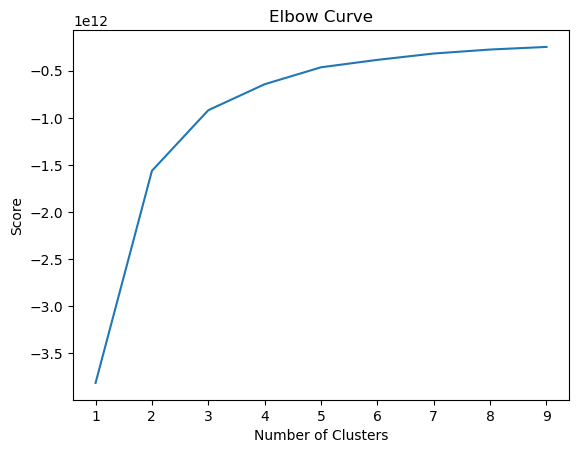

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Im going to use 3 clusters as this is where he curve starts to flatten out. The curve makes a big jump from 2 to 3 then rises slightly after that.

## 4. K-means Clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [17]:
df['clusters'] = kmeans.fit_predict(df)

In [18]:
df.head()

,arriving_flight_count,arrival_delayed_15_minutes_more,carrier_delay_count,weather_delay_count,nas_delay_count,security_delay_count,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes,clusters
0,13036,3402.0,953.44,150.22,861.12,20.44,1416.79,705,66,305694,105806,14883,53140,1112,130753,1
1,13455,3283.0,923.76,151.62,664.62,11.19,1531.81,299,110,287698,96155,15486,32454,411,143192,1
2,13504,2834.0,833.73,141.51,695.29,13.01,1150.45,1036,137,281392,97139,19105,57316,614,107218,1
3,18334,2605.0,487.65,64.93,1105.83,0.00,946.59,8,27,203424,53274,8268,56818,0,85064,1
4,7111,2344.0,692.03,40.01,634.42,5.02,972.52,356,53,145817,41159,3838,35806,135,64879,1


In [19]:
df['clusters'].value_counts()

2    34140
0     1149
1      192
Name: clusters, dtype: int64

In [20]:
#export df
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'wrangled_clusters.csv'))

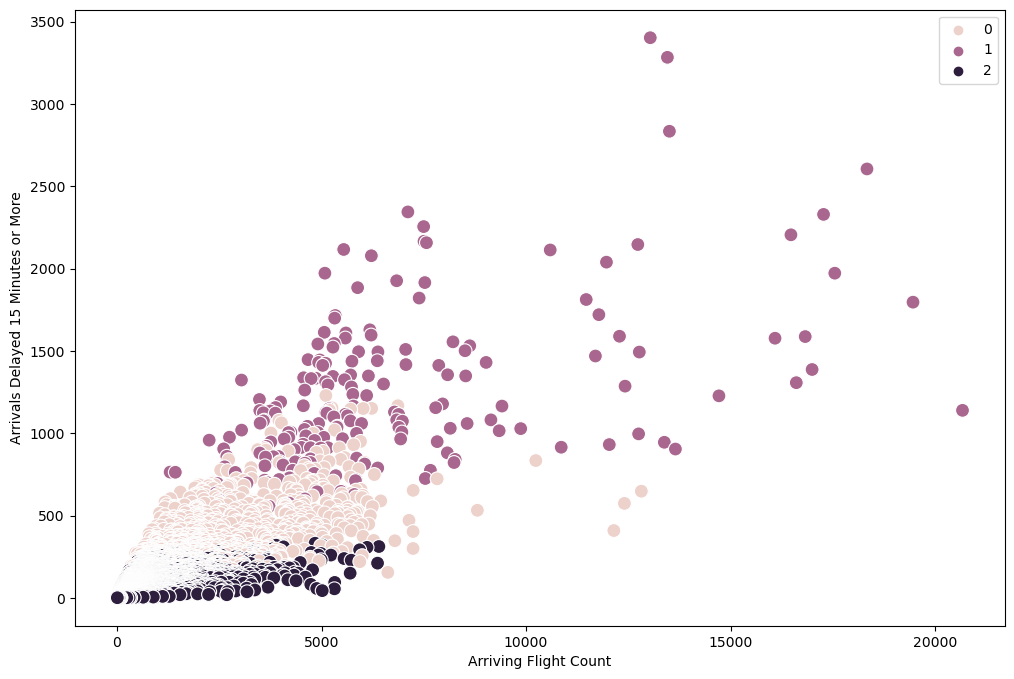

In [28]:
# Plot the clusters for the arriving_flight_count and arrival_delayed_15_minutes_more

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['arriving_flight_count'], y=df['arrival_delayed_15_minutes_more'], hue=kmeans.labels_, s=100) 
 
ax.grid(False) 
plt.xlabel('Arriving Flight Count') 
plt.ylabel('Arrivals Delayed 15 Minutes or More') 
plt.show()

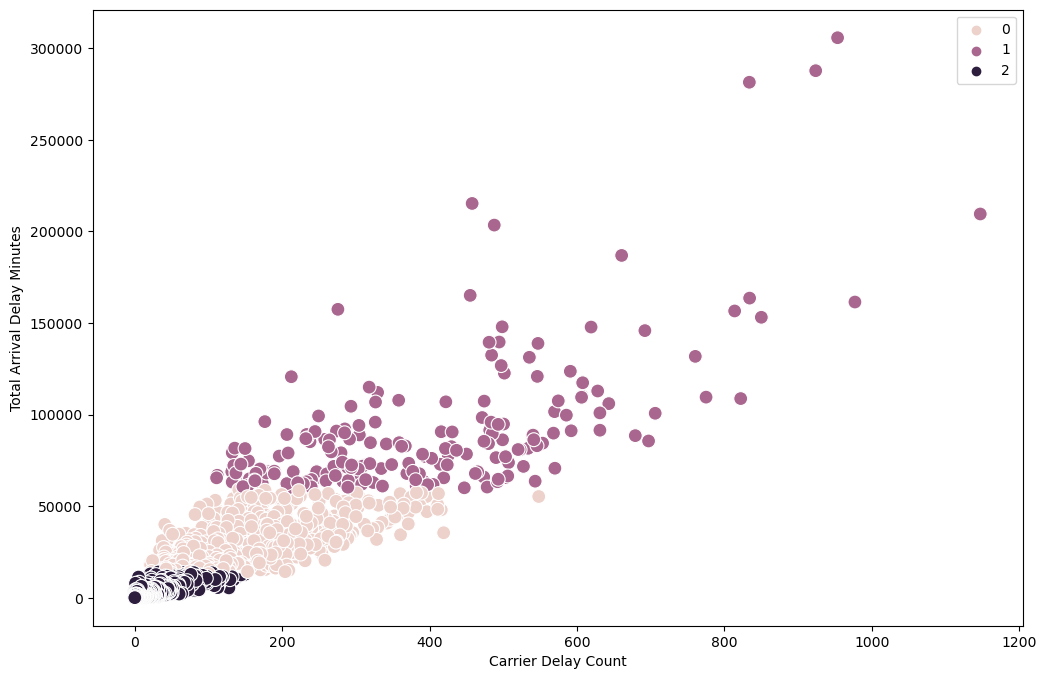

In [21]:
# Plot the clusters for the carrier_delay_count and arrival delay minutes

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['carrier_delay_count'], y=df['arrival_delay_minutes'], hue=kmeans.labels_, s=100) 
 
ax.grid(False) 
plt.xlabel('Carrier Delay Count') 
plt.ylabel('Total Arrival Delay Minutes') 
plt.show()

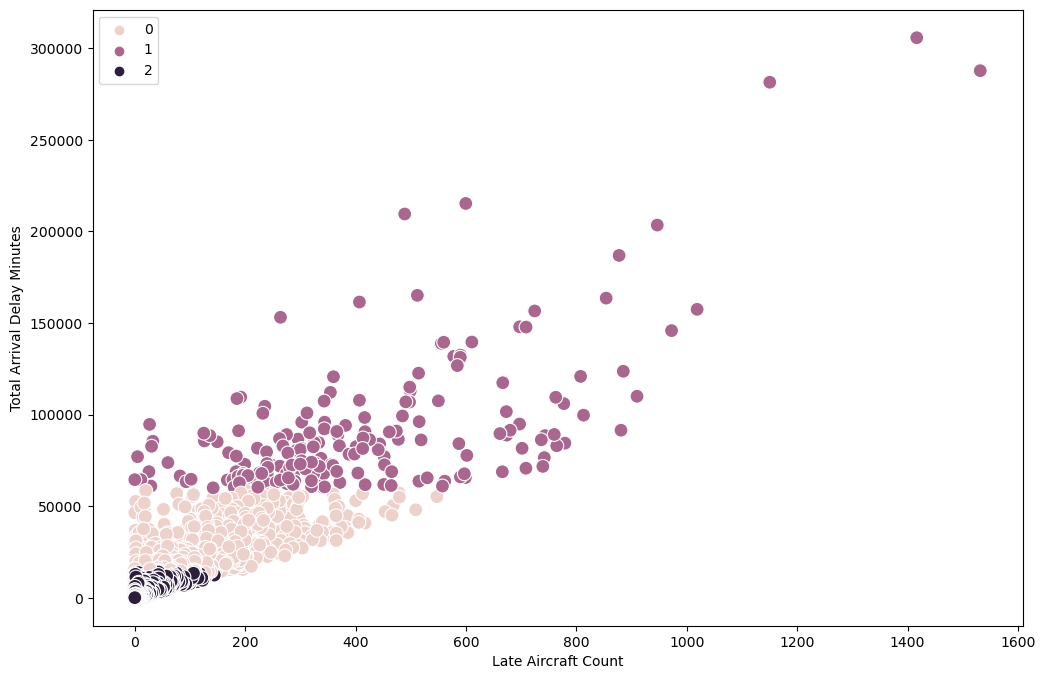

In [22]:
# Plot the clusters for the late_aircraft_count and arrival delay minutes

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['late_aircraft_count'], y=df['arrival_delay_minutes'], hue=kmeans.labels_, s=100) 
 
ax.grid(False) 
plt.xlabel('Late Aircraft Count') 
plt.ylabel('Total Arrival Delay Minutes') 
plt.show()

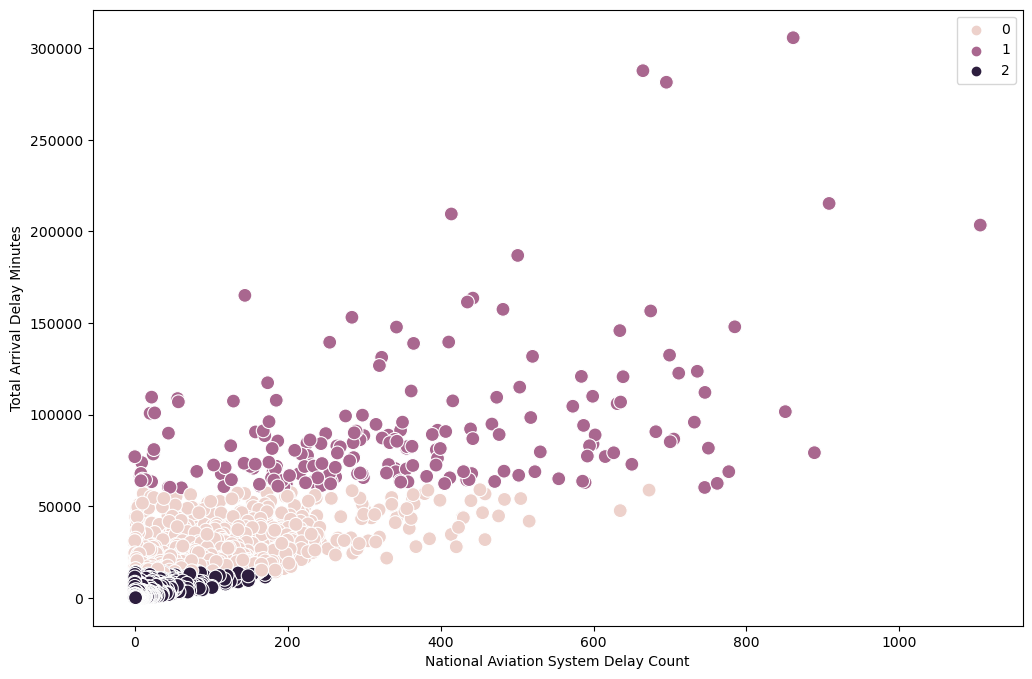

In [23]:
# Plot the clusters for the nas_delay and arrival delay minutes

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['nas_delay_count'], y=df['arrival_delay_minutes'], hue=kmeans.labels_, s=100) 
 
ax.grid(False) 
plt.xlabel('National Aviation System Delay Count') 
plt.ylabel('Total Arrival Delay Minutes') 
plt.show()

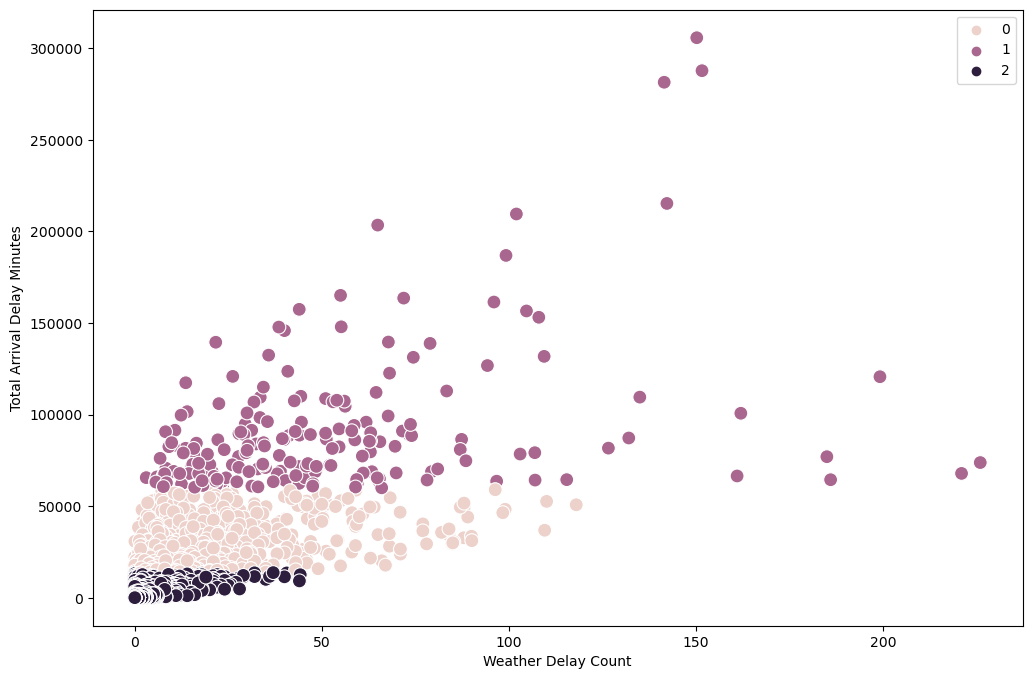

In [24]:
# Plot the clusters for the weather_delay_count and arrival delay minutes

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['weather_delay_count'], y=df['arrival_delay_minutes'], hue=kmeans.labels_, s=100) 
 
ax.grid(False) 
plt.xlabel('Weather Delay Count') 
plt.ylabel('Total Arrival Delay Minutes') 
plt.show()

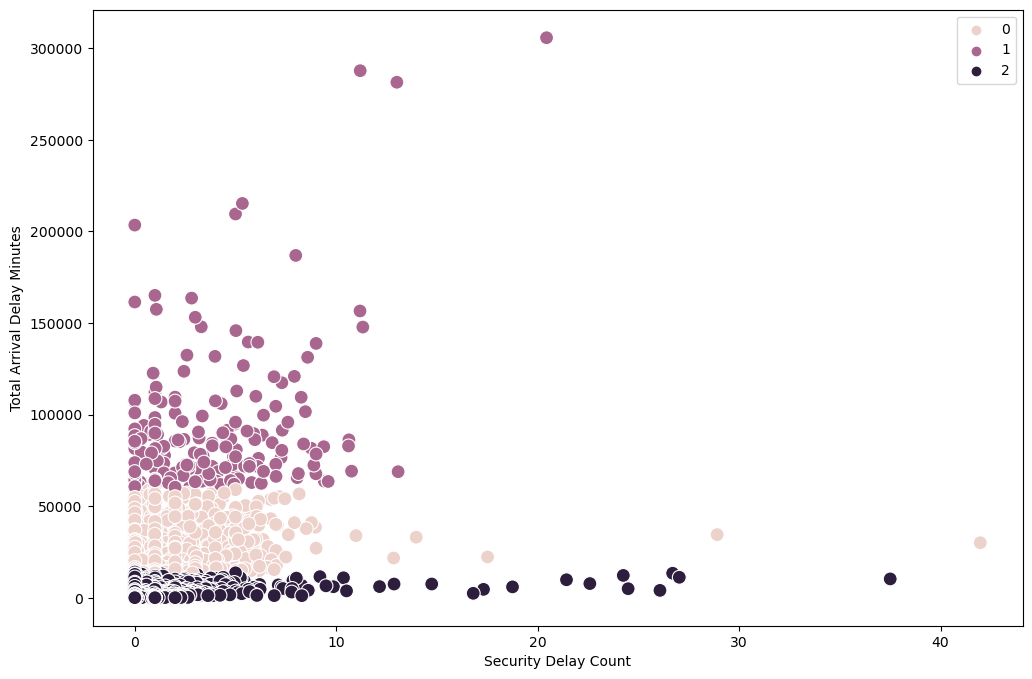

In [25]:
# Plot the clusters for the security_delay_count and arrival delay minutes

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['security_delay_count'], y=df['arrival_delay_minutes'], hue=kmeans.labels_, s=100) 
 
ax.grid(False) 
plt.xlabel('Security Delay Count') 
plt.ylabel('Total Arrival Delay Minutes') 
plt.show()

The clusters make sense because as the number of delays go up you would expect the total delay minutes to increase as well.

In [26]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
df.groupby('cluster').agg({'arrival_delayed_15_minutes_more':['mean', 'median'], 
                         'carrier_delay_count':['mean', 'median'], 
                         'late_aircraft_count':['mean', 'median'],
                         'nas_delay_count':['mean', 'median'],  
                         'security_delay_count':['mean', 'median'],  
                         'weather_delay_count':['mean', 'median']})

arrival_delayed_15_minutes_more         carrier_delay_count  \
                                       mean  median                mean   
cluster                                                                   
dark purple                       22.648330    10.0            9.288145   
pink                             378.361184   327.0          136.738695   
purple                          1220.322917  1102.5          399.274271   

                     late_aircraft_count         nas_delay_count          \
              median                mean  median            mean  median   
cluster                                                                    
dark purple    4.000            6.191909    2.00        6.000927    2.09   
pink         119.290          121.073368  103.03      103.610870   85.75   
purple       374.425          413.476094  343.89      351.295521  323.25   

            security_delay_count        weather_delay_count          
                            mean median                mean  median  
cluster                                                              
dark purple             0.109451  0.000            1.057953   0.000  
pink                    1.568120  1.000           15.370226   9.980  
purple                  3.680156  2.885           52.596302  42.965

For future analysis I will look into how different airport or airlines fit into these groups to see if an airline is in one group or spread across them all.